In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#Cargamos nuestro archivo CSV previamente ya preparado para su analisis, donde lo cargamos con la libreria pandas y mostramos las primeras 5 filas
df = pd.read_csv('Final.csv')

#Eliminamos la categoria de id de las columnas, esta no es necesaria en general solo es 1 categoria y ya se tiene el nombre
#creamos un df de la correlacion unicamente de los valores numericos
df = df.drop(columns=['ID_CATEGORY'])
dfCorr = df.corr(numeric_only=True)

#De nuestro DF principal nos aseguramos que DATE sea de tipo fecha
df['DATE'] = pd.to_datetime(df['DATE'])
df = df[df['BRAND'] == 'VANISH']

#Agrupamos un nuevo DF por AÑO y por Mes sumando el total de de unidades y de venta, ordenandolo primero por año y luego por el Mes
dfYearMonthSales = (df.groupby(['YEAR','MONTH'])[['TOTAL_UNIT_SALES','TOTAL_VALUE_SALES']].
    sum().reset_index().sort_values(by=['YEAR','MONTH'], ascending = [True,True]))

#sacamos la media de ventas mensuales de cada Año
dfMeansMonthPerYear = (df.groupby(['YEAR','MONTH'])[['TOTAL_UNIT_SALES','TOTAL_VALUE_SALES']].sum().reset_index()
    .groupby(['YEAR'])[['TOTAL_UNIT_SALES','TOTAL_VALUE_SALES']].mean().reset_index())

#Agrupamos por Año, mes y Producto para sacar el TOP 3 Productos MAS Vendidos de cada Mes por cada Año
dfTop3ProductsSalesMonth = (df.groupby(['YEAR','MONTH','ITEM_CODE'])[['TOTAL_UNIT_SALES','TOTAL_VALUE_SALES']].sum().reset_index()
    .sort_values(by=['YEAR','MONTH','TOTAL_VALUE_SALES'], ascending=[True,True,False]).groupby(['YEAR','MONTH']).head(3))


#Agrupamos por Año, mes y Producto para sacar el TOP 3 Productos MENOS Vendidos de cada Mes por cada Año
dfLow3ProductsSalesMonth = (df.groupby(['YEAR','MONTH','ITEM_CODE'])[['TOTAL_UNIT_SALES','TOTAL_VALUE_SALES']].sum().reset_index()
    .sort_values(by=['YEAR','MONTH','TOTAL_VALUE_SALES'], ascending=[True,True,False]).groupby(['YEAR','MONTH']).tail(3))

,YEAR,MONTH,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES
0,2021,12,42.482,1148.872
1,2022,1,60.444,1564.997
2,2022,2,54.792,1933.647
3,2022,3,46.494,1652.413
4,2022,4,153.219,3339.598
5,2022,5,172.942,3381.374
6,2022,6,144.069,2539.962
7,2022,7,178.361,2774.969
8,2022,8,166.810,3024.073
9,2022,9,162.622,2617.613


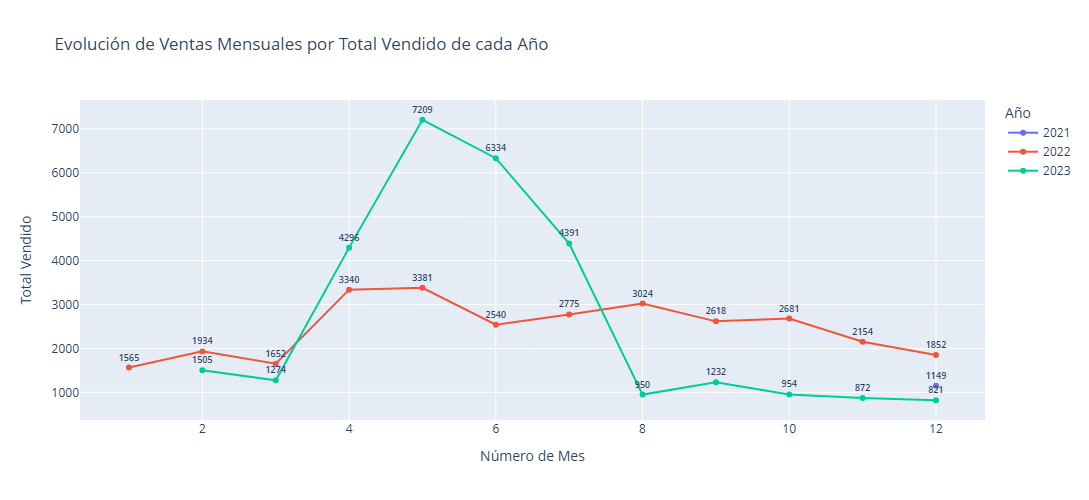

In [7]:
fig = px.line(
    dfYearMonthSales, 
    x="MONTH",
    y="TOTAL_VALUE_SALES",
    text=dfYearMonthSales['TOTAL_VALUE_SALES'].round(0),
    color="YEAR",
    markers=True,
    title="Evolución de Ventas Mensuales por Total Vendido de cada Año",
    labels={
        "MONTH": "Número de Mes",
        "TOTAL_VALUE_SALES": "Total Vendido",
        "YEAR": "Año"
    },
    height=500
)
fig.update_traces(
    textposition="top center",
    textfont=dict(size=9, weight="bold")  
)
fig.show()

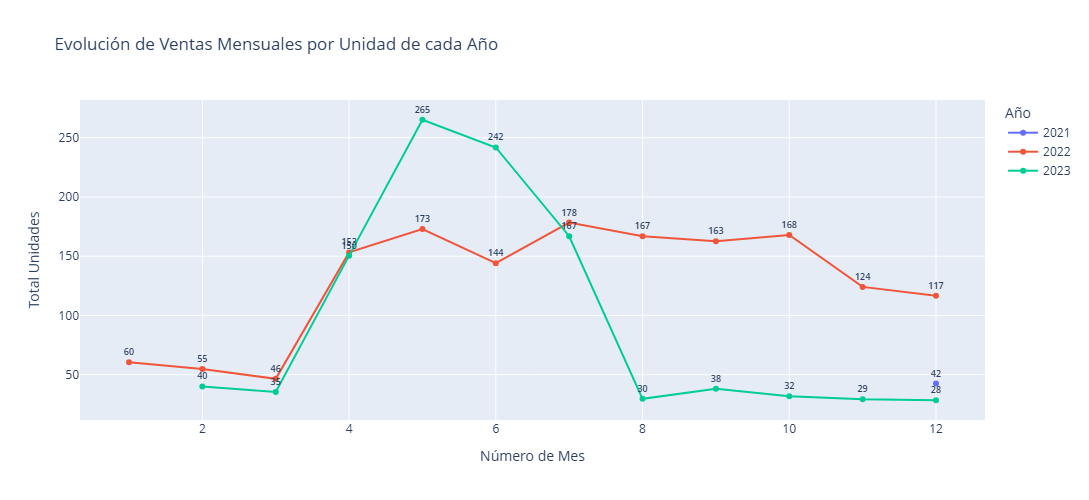

In [8]:
fig = px.line(
    dfYearMonthSales, 
    x="MONTH",
    y="TOTAL_UNIT_SALES",
    text=dfYearMonthSales['TOTAL_UNIT_SALES'].round(0),
    color="YEAR",
    markers=True,
    title="Evolución de Ventas Mensuales por Unidad de cada Año",
    labels={
        "MONTH": "Número de Mes",
        "TOTAL_UNIT_SALES": "Total Unidades",
        "YEAR": "Año"
    },
    height=500
)
fig.update_traces(
    textposition="top center",
    textfont=dict(size=9, weight="bold")  
)
fig.show()